# Bike Dataset

Machine learing application on Seoul Bike dataset.

Some information.

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

You can find the dataset in thin link: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [90]:
import copy
import seaborn as sns
import tensorflow as tf

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df = pd.read_csv('SeoulBikeData.csv').drop(['Date', 'Seasons', 'Holiday'], axis=1)

In [93]:
df.columns = cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [94]:
df

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


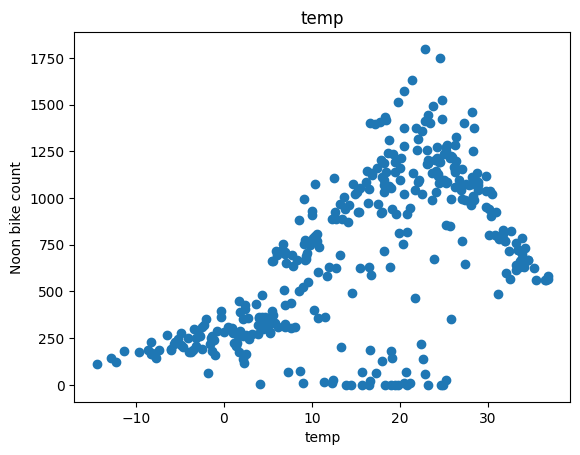

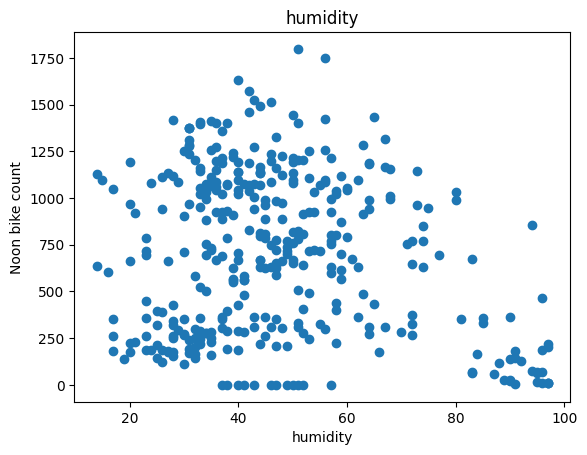

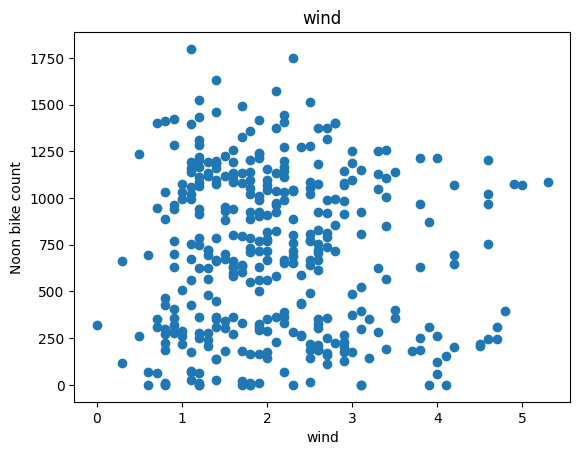

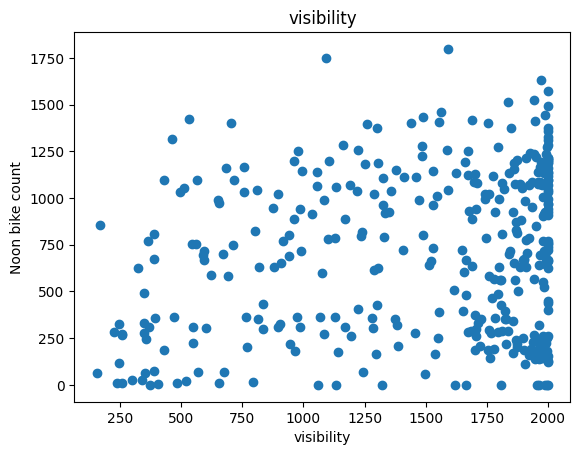

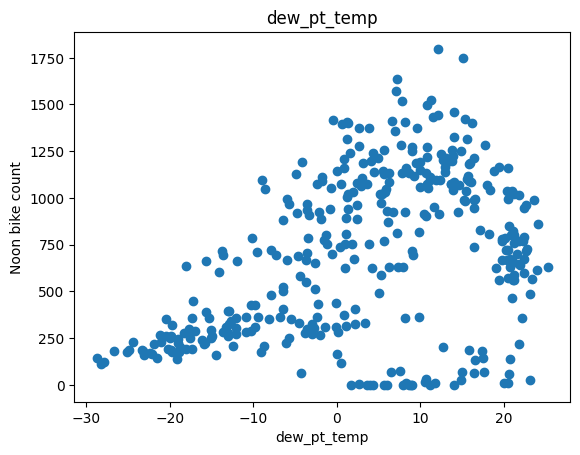

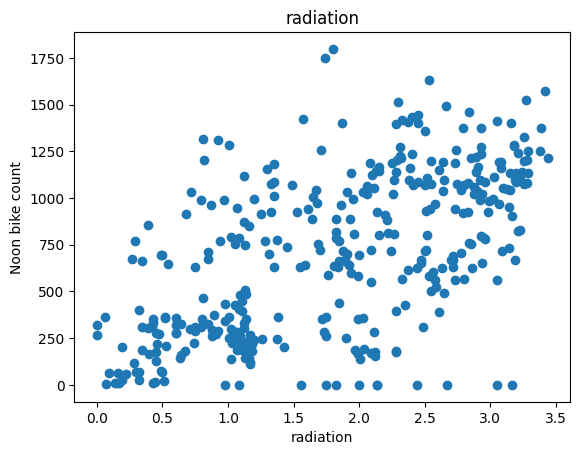

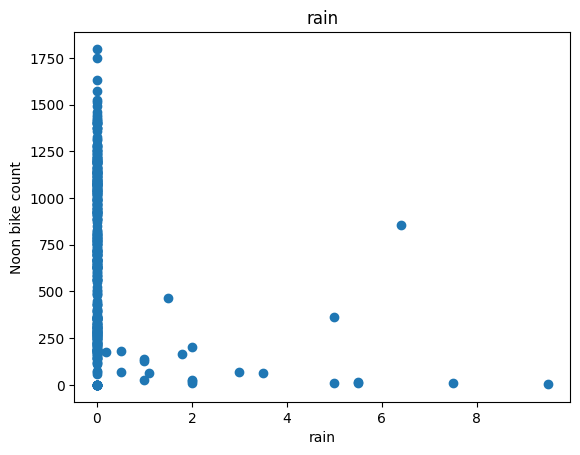

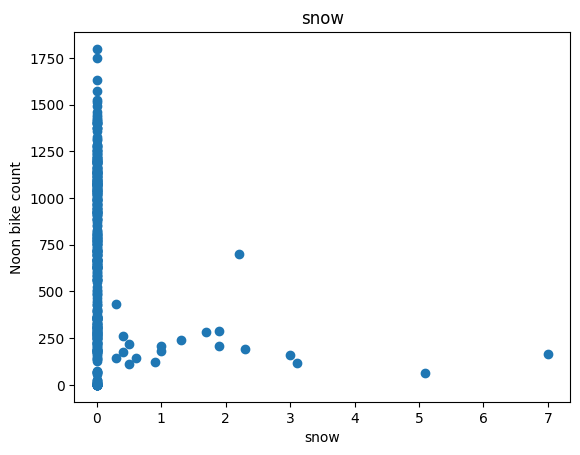

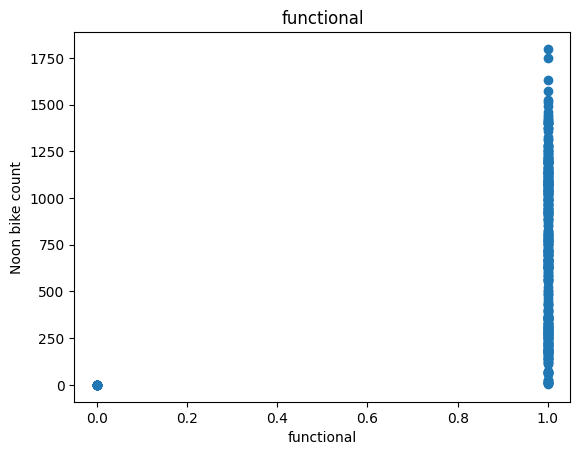

In [95]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel("Noon bike count")
    plt.xlabel(label)
    plt.show()

According to the scatter plot, wind, visibility and functional, are not very promising or useful.

In [96]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

In [97]:
df

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


# Splitting Data

In [98]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [99]:
def get_Xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [100]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp'])

# Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [103]:
print(reg.coef_, reg.intercept_)

[[19.46280241]] [369.55942005]


In [104]:
reg.score(X_test, y_test)

0.4207662128297994

This low score means that there is no association between bike count and temperature.
If we try dew_pt_temp with temp, the score is up to 86%.

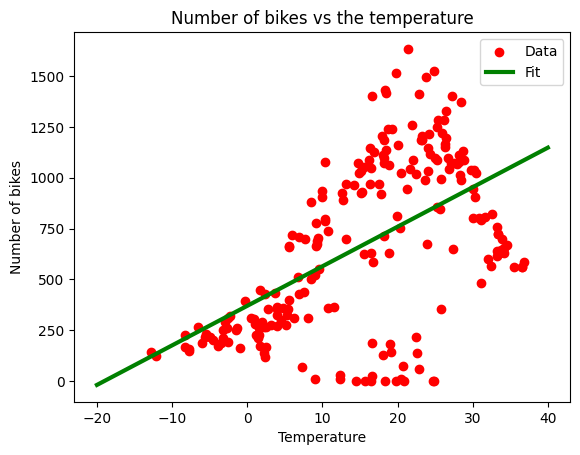

In [105]:
plt.scatter(X_train, y_train, label = 'Data', color='red')
x = tf.linspace(-20, 40, 100)
plt.plot(x, reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="green", linewidth=3)
plt.legend()
plt.title('Number of bikes vs the temperature')
plt.ylabel('Number of bikes')
plt.xlabel('Temperature')
plt.show()

What about multiple Linear Regression?

# Multiple Linear Regression

In [106]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [107]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [108]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])

In [109]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [110]:
reg.score(X_test, y_test)

0.5764036982901148

The score for sure improved. But we can do better.

# Neural Network Regression

In [111]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [112]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp'])

In [113]:
tf.keras.backend.clear_session()


In [114]:
normal = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
normal.adapt(X_train.reshape(-1))

In [115]:
model = tf.keras.Sequential([
    normal,
    tf.keras.layers.Dense(1)
])

#for linear models, you don't need many layers.

In [116]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [117]:
history = model.fit(
    X_train.reshape(-1), y_train,
    verbose=0,
    epochs=500,
    validation_data=(X_val, y_val)
)

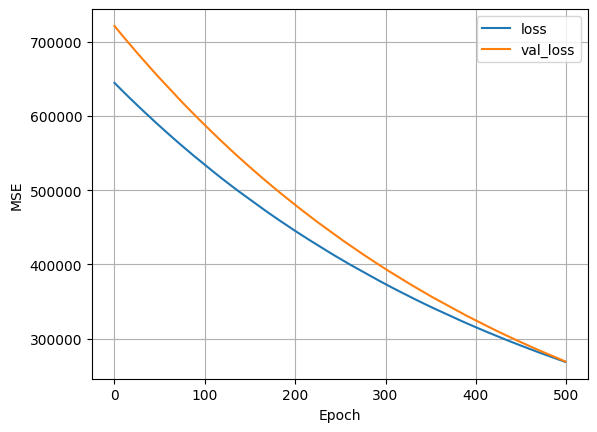

In [118]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


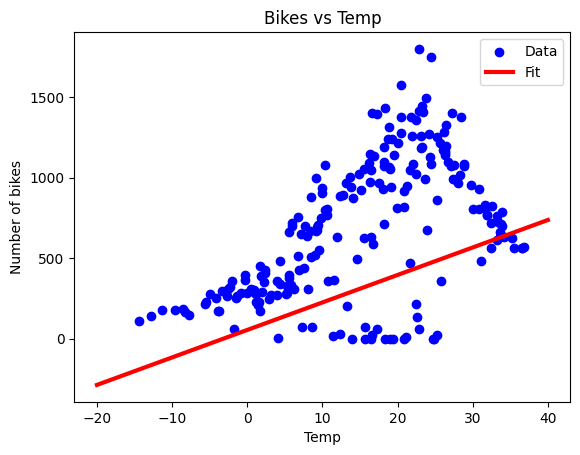

In [119]:
plt.scatter(X_train, y_train, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

What about one vs all?

In [120]:
tf.keras.backend.clear_session()

In [121]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [122]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [123]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])

In [124]:
normal = tf.keras.layers.Normalization(input_shape=(6,1), axis=-1)
normal.adapt(X_train)

In [125]:
model = tf.keras.Sequential([
    normal,
    tf.keras.layers.Dense(1)
])

#for linear models, you don't need many layers.

In [126]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [127]:
history = model.fit(
    X_train, y_train,
    verbose=0,
    epochs=100,
    validation_data=(X_val, y_val)
)

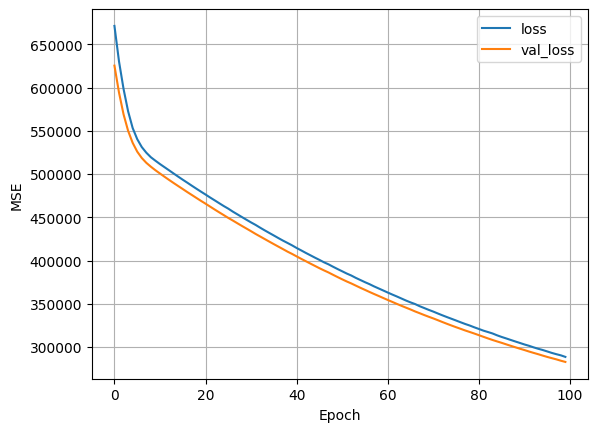

In [128]:
plot_loss(history)

# Neural Network

Let's add some more layers on our previous network

In [129]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp'])

In [130]:
tf.keras.backend.clear_session()

In [131]:
normal = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
normal.adapt(X_train.reshape(-1))

In [132]:
model = tf.keras.Sequential([
    normal,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [133]:
history = model.fit(
    X_train, y_train,
    verbose=0,
    epochs=100,
    validation_data=(X_val, y_val)
)

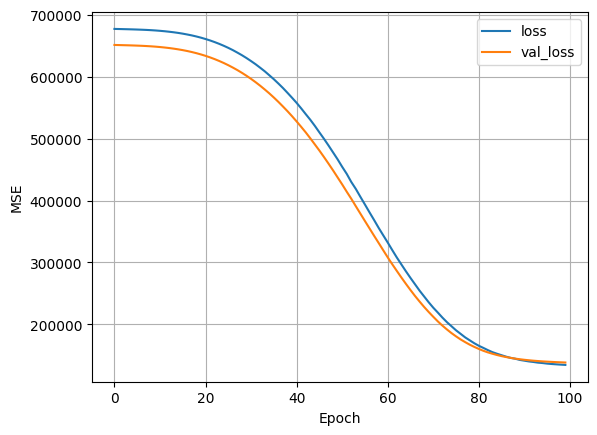

In [134]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


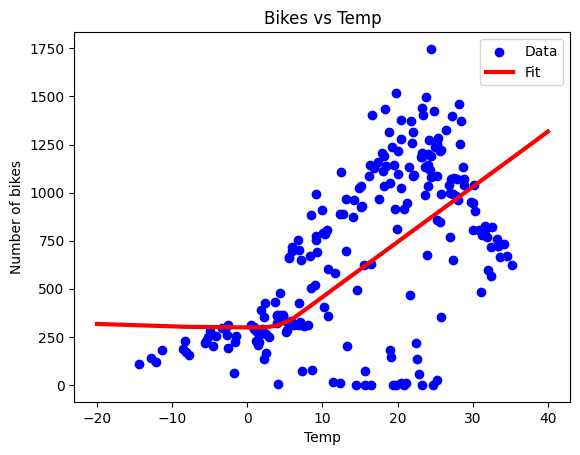

In [135]:
plt.scatter(X_train, y_train, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

One vs ALL

In [136]:
tf.keras.backend.clear_session()

In [137]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [138]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [139]:
_, X_train, y_train = get_Xy(train, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_val, y_val = get_Xy(val, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])
_, X_test, y_test = get_Xy(test, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain','snow'])

In [140]:
normal = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
normal.adapt(X_train)

In [141]:
model = tf.keras.Sequential([
    normal,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [142]:
history = model.fit(
    X_train, y_train,
    verbose=0,
    epochs=100,
    validation_data=(X_val, y_val)
)

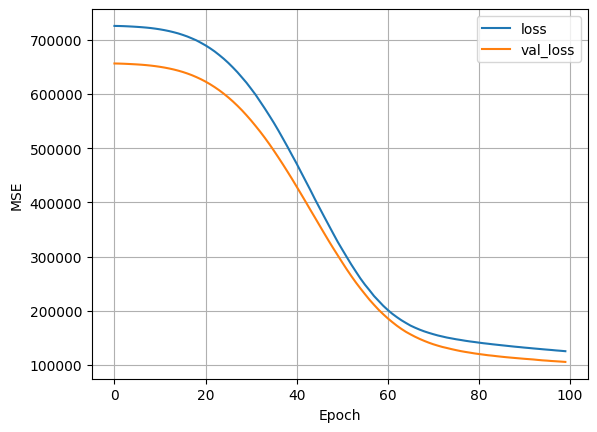

In [143]:
plot_loss(history)

# Mean Square

In [144]:
y_pred_linear = reg.predict(X_test)
y_pred_all = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [145]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [146]:
MSE(y_pred_linear, y_test)

104507.07577529254

In [147]:
MSE(y_pred_all, y_test)

117180.40376983424

The mean square error on the Neural Network is larger than the mse of the Linear Regression.

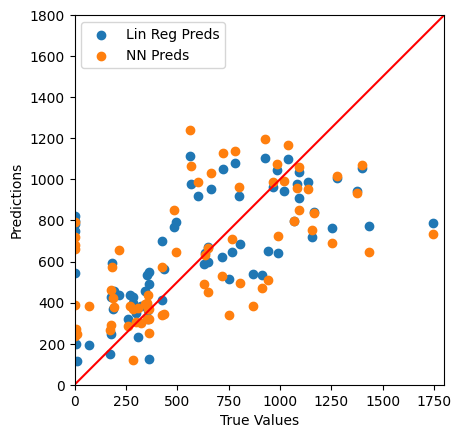

In [148]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, y_pred_linear, label="Lin Reg Preds")
plt.scatter(y_test, y_pred_all, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")